In [3]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

<IPython.core.display.Javascript object>

`%matplotlib` prevents importing * from pylab and numpy


Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\PREr-graphs
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\PREr-graphs
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
path = base + "h5/"

from packing_tools import V_harm, make_shear_graphs
from hdf_tools import getcc
from hdf_tools.pytables_tools import read_packing

float64 instead of float128...


In [5]:
def mkaxes(l,b,r,t,margin=0.01,ml=True,mb=True,mr=True,mt=True,*args, **kwargs):
    hmargin = margin * gcf().get_figheight()
    vmargin = margin * gcf().get_figwidth()
    
    cl,cb,cr,ct = gca().bbox._bbox.extents
    
    nl = cl + (cr-cl) * l  + (hmargin * ml)
    nb = cb + (ct-cb) * b  + (vmargin * mb)
    nr = cl + (cr-cl) * r  - (hmargin * mr)
    nt = cl + (ct-cb) * t  - (vmargin * mt)
    

    rect = [nl, nb, (nr-nl), (nt-nb)]
    return axes(rect, *args, **kwargs)

# Figure 1

(a) Plot of a packing with applied shear, just after cc. Particles losing contact are indicated. 

(b) Plot of stress-strain curve, with $\gamma^{cc}$, $G_0$ and $G_1$ indicated

In [13]:
packs = tables.File(path + "N64~P1e-6_shear.h5").root.__iter__().next().__iter__().next().__getattr__('9012')

base = packs.SR.data[0]
before, after = getcc.get_first_cc(packs)

hprint("Packing statistics:")
hprint(r"<b>base</b>: $\alpha$ = %.3e, $\gamma$ = %.3e, $N_c$ = %i" % (base['alpha'], base['gamma'], base["Ncontacts"]))
hprint(r"<b>after</b>: $\alpha$ = %.3e, $\gamma$ = %.3e, $\sigma$ = %.3e, $N_c$ = %i" % (after['alpha'], after['gamma'], after["s_xy"], after["Ncontacts"]))

Packing statistics:

base : $\alpha$ = 8.239e-02, $\gamma$ = 0.000e+00, $N_c$ = 125

after : $\alpha$ = 8.239e-02, $\gamma$ = 9.004e-07, $\sigma$ = 3.123e-08, $N_c$ = 124

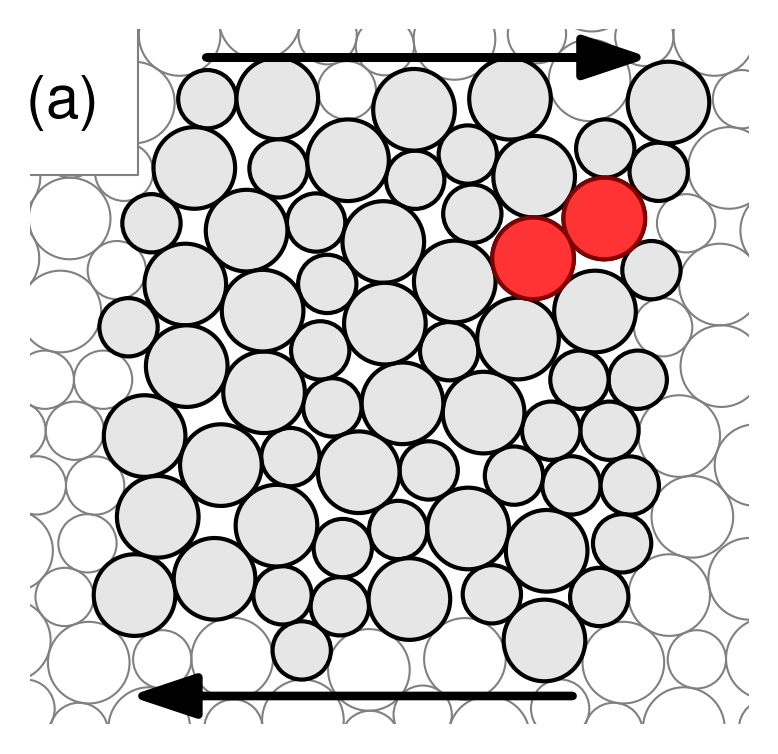

In [14]:
import packing_tools.make_shear_graphs
reload(packing_tools.make_shear_graphs)
from packing_tools.make_shear_graphs import plotunitcell, plotparticle, plotparticles, plotcontacts, scalefig

basepack = read_packing(packs._v_file.getNode(base['path']))
afterpack = read_packing(packs._v_file.getNode(after['path']))

changed_particles = where(V_harm.get_contacts(basepack)['connmatrix'] ^ V_harm.get_contacts(afterpack)['connmatrix'])
p1, p2 = changed_particles[0][0], changed_particles[0][1]

figure(figsize=half_fig_size)
axes([0,0,1,1], aspect= 'equal', frameon=False)

xticks([])
yticks([])

for offset_num in [(-1,0), (0,-1), (-1,1), (1,-1), (-1,-1), (1,0), (0,1), (1,1)]:
    realoffset = (basepack["L1"] * offset_num[0] + basepack["L2"] * offset_num[1])
    plotparticles(basepack, realoffset, lw=.5, color="gray") #="xxxx")

plotparticles(basepack, lw=1, color="black", fc=(.9,.9,.9))
    
hw = 0.07
yoff = 0.07
arlen = 0.7
arrow(basepack["L1"][0] * ((0.5 + arlen/2) + hw/2),
      basepack["L2"][1] * -yoff,
      basepack["L1"][0] * -arlen,
      0,
      head_width=basepack["L1"][0] * hw,
      color='k',
      lw=2)

arrow(basepack["L1"][0] * ((0.5 - arlen/2) - hw/2) + basepack["L2"][0],
      basepack["L2"][1] * (1+yoff),
      basepack["L1"][0] * arlen,
      0,
      head_width=basepack["L1"][0] * hw,
      color='k',
      lw=2)

plotparticle(basepack, p1, fc=(1,.2,.2), color=(.5,0,0))
plotparticle(basepack, p2, fc=(1,.2,.2), color=(.5,0,0))

scalefig(basepack, extent=0.12)
gca().add_patch(Rectangle((-0.01,0.78),0.16,0.22, transform=gcf().transFigure, color=(1,1,1), ec="gray", lw=.5))

text(0,0.92, r'\sf(a)', transform=gcf().transFigure, verticalalignment='top', horizontalalignment='left', size='x-large')
savefig('F1a-packing.pdf')

In [15]:
# placeholder

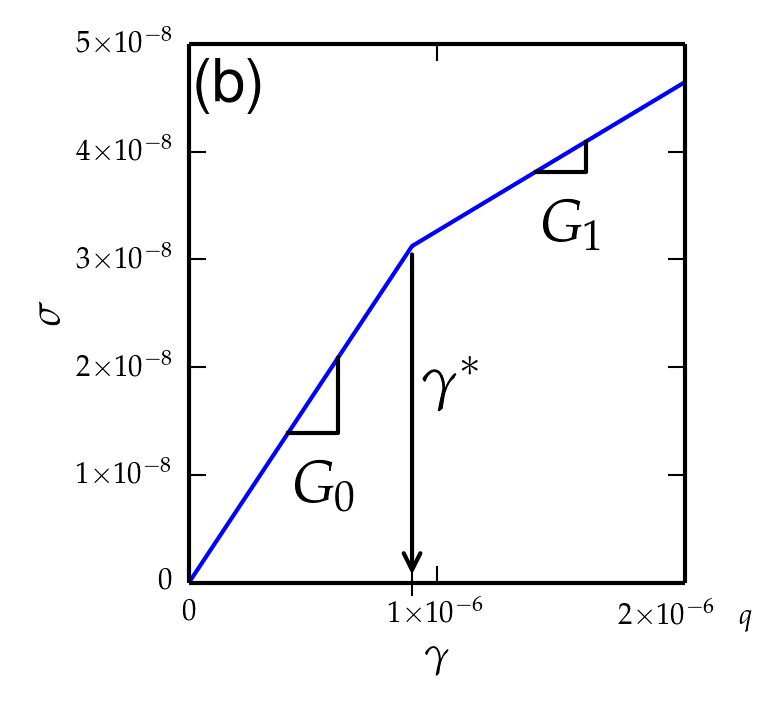

In [16]:
f = halffig()
ax = f.gca()

sheardata = packs.SR.data.read()
sheardata.sort(order=["gamma"])
ax.plot(sheardata["gamma"] / 1e-6, sheardata["s_xy"] / 1e-8, "-")

ax.set_xlabel(r"$\gamma /  10^{-6}$")
ax.set_ylabel(r"$\sigma /  10^{-8}$")
ax.axis((0, 2 , 0, 5))

# gammacc
#plot(after['gamma']/ 1e-6, after['s_xy']/ 1e-8, "o", color='red')
#arrow(after['gamma']/ 1e-6, after['s_xy']/ 1e-8, 0, -after['s_xy']/ 1e-8 + 0.2, color="red", arrowstyle="->")
#plot([after['gamma']/ 1e-6, after['gamma']/ 1e-6], [after['s_xy']/ 1e-8, 0], ":", color="red")

gs = after['gamma']/ 1e-6
ss = after['s_xy']/ 1e-8
ax.annotate("",
            xy=(gs, 0), xycoords='data',
            xytext=(gs, ss), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            )
            )
plot(gs, 0, "|", color='black', clip_on=False)
text(gs + 0.04, ss/2, r"$\gamma^{*}$", verticalalignment="bottom", horizontalalignment="left", size='x-large')


# G0
p = [0.4, 0.6]
x = [p[0], p[1], p[1]]
y = interp([p[0], p[0], p[1]], sheardata["gamma"] / 1e-6,  sheardata["s_xy"] / 1e-8)
print 
plot(x,y,color="black", lw=1)
text(0.5*(x[0]+x[1]) + 0.05, y[0]-0.6,
     "$G_0$",
     verticalalignment='center', horizontalalignment='center',
     size='x-large')

# G1
p = [1.4, 1.6]
x = [p[0], p[1], p[1]]
y = interp([p[0], p[0], p[1]], sheardata["gamma"] / 1e-6,  sheardata["s_xy"] / 1e-8)

plot(x,y,color="black", lw=1)
text(0.5*(x[0]+x[1]) + 0.05, y[0]-0.6, "$G_1$", verticalalignment='center', horizontalalignment='center', size='x-large')

xticks([0,1,2], [r"$0$", r"$\setlength{\medmuskip}{0mu}1\times 10^{-6}$", r"$\setlength{\medmuskip}{0mu}2\times 10^{-6}\ \ \ q$"], size='x-small')
ax.set_xlabel(r"$\gamma$", labelpad=1) # /  10^{-6}$")

yticks([0,1,2,3,4,5], [r"$0$"] + [r"$\setlength{\medmuskip}{0mu}%i\times 10^{-8}$" % i for i in [1,2,3,4,5]], size='x-small')
ax.set_ylabel(r"$\sigma$", labelpad=1) # /  10^{-6}$")

text(0.26,0.92, r'\sf(b)', transform=f.transFigure, verticalalignment='top', horizontalalignment='left', size='x-large')

savefig('F1b-stresstrain.pdf')

In [21]:
# placeholder

# Figure 2

16 -6 1987 [ 0.  0.  1.] x
16 -2 1892 [ 0.  0.  1.] +
1024 -6 243 [ 0.75  0.    0.25] s
1024 -2 1036 [ 0.75  0.    0.25] o


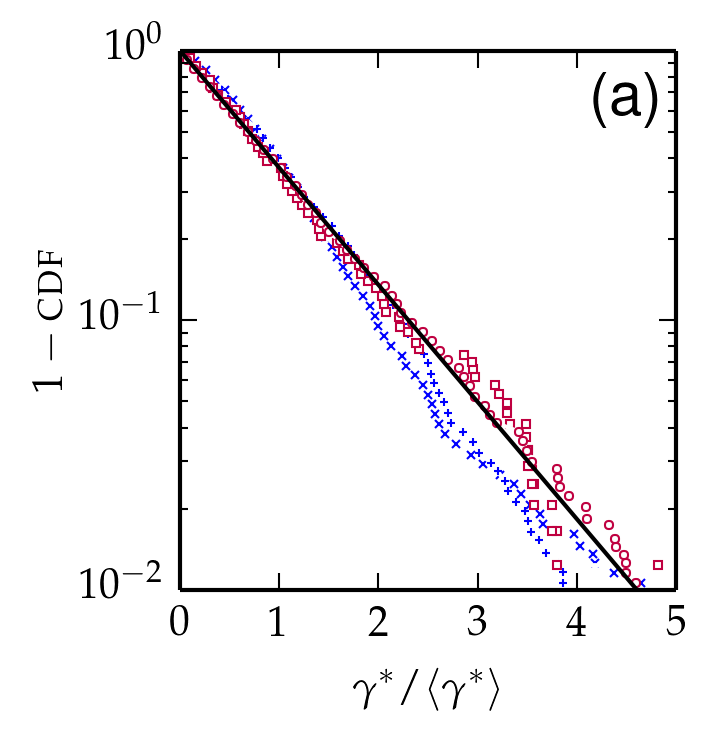

In [24]:
halffig()

dataN = summ["N"]
datalP = around(log10(summ["P"]),2)
datanum = summ["num"]

Xs = []
Ys = []

y = linspace(0,1,1000)

colors = {(16,-6): 'r', (16,-2): 'r', (1024,-6): 'b', (1024,-2): 'b'}
markers = {(16,-6): 'x', (16,-2): '+', (1024,-6): 's', (1024,-2): 'o'}



for N in [16, 1024]:
    for lP in [-6, -2]:
        mask = (dataN == N) * (datalP == lP)
        gammas = summ[mask]["gamma_min"]   
        npm = NPmapper(N, 10**lP)
        print N,lP,len(gammas), npm["mec"], markers[(N,lP)]
        cx,cy = cdf.get_cdf_data(gammas / mean(gammas))
        
        ids = len(cx) - (unique(int_(logspace(0,log10(len(cx)),100))))
        cx = np.array(cx)[ids]; cy = np.array(cy)[ids]
        
        plot(cx, 1-cy, label="$N=%i, P=10^{%i}$" % (N,lP), ms=2, color="w", mec=npm["mec"], marker=markers[(N,lP)])
        #plot(interp(y, cy, cx), 1-y,
        #     color=colors[(N,lP)], linestyle=linestyles[(N,lP)],
             
       # )

x = linspace(0,5)
plot(x,exp(-x), "k")

semilogy()
axis(xmin=0, xmax=5, ymin=1e-2, ymax=1e0)

xlabel(r"$\gamma^*/\langle\gamma^*\rangle$")
ylabel(r"$\mathrm{1-\textsc{cdf}}$", labelpad=2)

text(0.98,0.96, r'\sf(a)', transform=gca().transAxes,
     verticalalignment='top',
     horizontalalignment='right',
     size='x-large')

savefig("F2a-examples.pdf")

#legend(loc="upper right")

\includegraphics{notebooks/PREr-graphs/F2b-dZscaling.pdf}


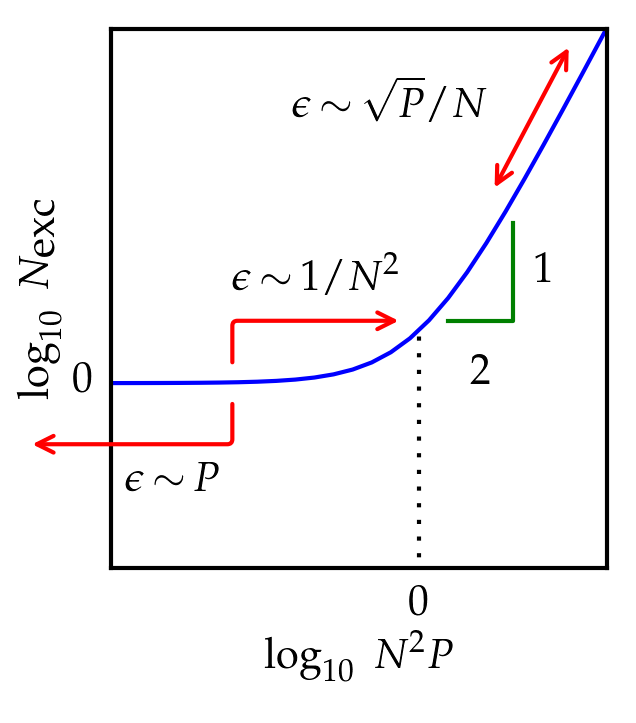

In [15]:
linecolor = 'blue'
arrowcolor = 'red'
textcolor = 'black'
trianglecolor = 'green'

halffig()
loglog()
xlabel(r"$\log_{10}~N^2P$", labelpad=4)
ylabel(r"$\log_{10}~N_\textrm{exc}$", labelpad=0)
# xticks([])
# yticks([])

x = logspace(-5,5)
plot(x, sqrt(1+x), color=linecolor)

axis(ymin=3e-1, ymax=1e1, xmin=5e-4, xmax=1e2)

annotate("",
                xy=(-0.2,0.23), xycoords="axes fraction",
                xytext=(1e-2,1), textcoords='data',
                arrowprops=dict(arrowstyle="->", 
                                shrinkA=5, shrinkB=5,
                                color=arrowcolor,
                                patchA=None,
                                patchB=None,
                                connectionstyle="angle,angleA=90,angleB=0,rad=5",
                                ),
                )

text(0.03,0.20,r"$\setlength{\thickmuskip}{3mu}\epsilon \sim P$", transform=gca().transAxes, verticalalignment='top', color=textcolor)

annotate("",
                xy=(1,1.5), xycoords="data",
                xytext=(1e-2,1), textcoords='data',
                arrowprops=dict(arrowstyle="->", 
                                color=arrowcolor,
                                shrinkA=5, shrinkB=5,
                                patchA=None,
                                patchB=None,
                                connectionstyle="angle,angleA=90,angleB=0,rad=5",
                                ),
                )

text(1e-2, 1.7,r"$\setlength{\thickmuskip}{3mu}\epsilon \sim 1/N^2$", verticalalignment='bottom', color=textcolor)

annotate("",
                xy=(1e2/2,1e1), xycoords="data",
                xytext=(1e1/2,sqrt(1e1)), textcoords='data',
                arrowprops=dict(arrowstyle="<->", 
                                shrinkA=5, shrinkB=5,
                                color=arrowcolor,
                                patchA=None,
                                patchB=None,
                                connectionstyle="arc3,rad=0",
                                ),
                )

text(1e1/2,7, r"$\setlength{\thickmuskip}{3mu} \epsilon\sim\sqrt{P}/{N}$", verticalalignment="top", horizontalalignment="right", color=textcolor)

plot([2,10,10], [1.5,1.5,sqrt(8)], color=trianglecolor)
text(10**(0.5*(log10(2) + log10(10))), 1, "$2$", color=textcolor, horizontalalignment ='center')
text(17, 10**(0.5*(log10(1.5) + log10(sqrt(8)))), r"$1$", color=textcolor, verticalalignment='center')

#xticks([1], [r"$1$"])
#yticks([1], [r"$1$"])
xticks([])
yticks([])

tick_params(which="both", bottom=False, top=False, left=False, right=False)

plot([1,1],[1e-9,sqrt(1+1)], "k:")

xticks([1], [r"$0$"])
yticks([1], [r"$0$"])

#text(1, 3.2e-1, "$N^2P=1$", rotation=90,
#     verticalalignment="bottom",
#     horizontalalignment="right",
#     size="small")

#text(5e-4, 1, r"$N\Delta z=1$",
#     verticalalignment="bottom",
#     horizontalalignment="left",
#     size="small")

#text(0.02,0.96, r'\sf(b)', transform=gca().transAxes,
#     verticalalignment='top',
#     horizontalalignment='left',
#     size='x-large')

savefig("F2b-dZscaling.pdf")

# Figure 3

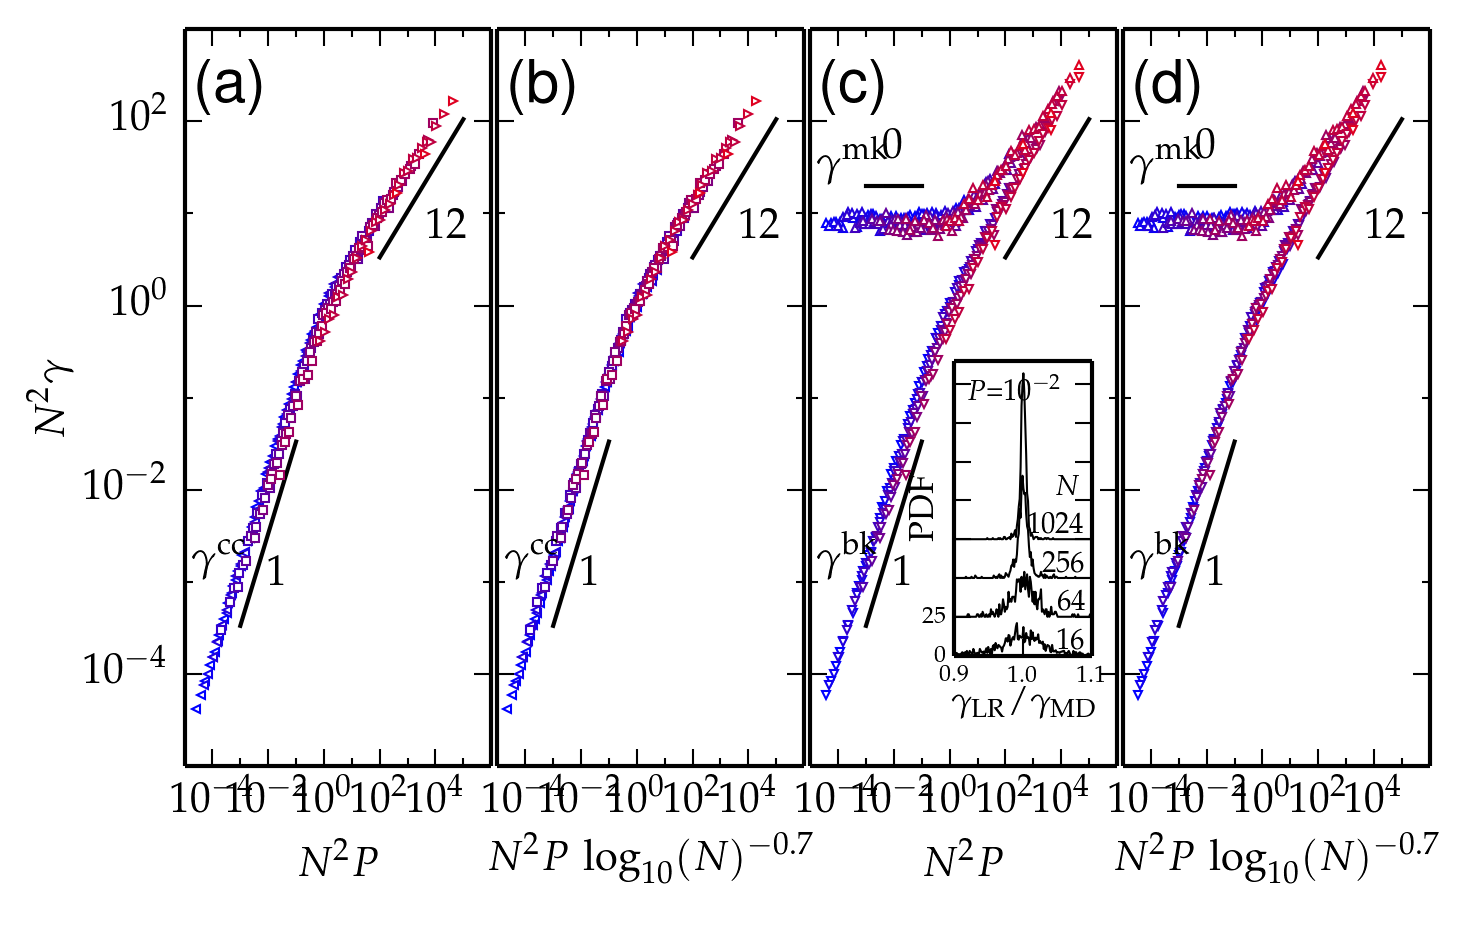

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig=fullfig()

ax1 = subplot(1,4,1, )
ax2 = subplot(1,4,2, sharey=ax1, sharex=ax1)
ax3 = subplot(1,4,3, sharey=ax1, sharex=ax1)
ax4 = subplot(1,4,4, sharey=ax1, sharex=ax1)

for ax in [ax2, ax3, ax4]:
    setp( ax.get_yticklabels(), visible=False)

subplots_adjust(wspace=0.02)

for ax in [ax1, ax2, ax3, ax4]:
    ax.loglog()
    ax.set_xlim(1e-5, 1e6)
    ax.set_xticks([1e-4,1e-2,1e0,1e2,1e4])
    ax.set_xticks([1e-5,1e-3,1e-1,1e1,1e3,1e5], minor=True)

for letter,ax in zip('abcd', [ax1, ax2, ax3, ax4]):
    ax.text(0.04,0.96, r'\sf(%s)' % letter,
            transform=ax.transAxes,
            verticalalignment='top',
            horizontalalignment='left',
            size='x-large')

ax1.set_ylim(1e-5, 1e3)
ax1.set_yticks([1e-4,1e-2,1e0,1e2])
ax1.set_yticks([1e-5,1e-3,1e-1,1e1,1e3], minor=True)    

ax1.set_ylabel(r"$N^{2}\gamma$", labelpad=2)
ax1.set_xlabel(r"$N^2P$")
ax2.set_xlabel(r"$N^2P\>\log_{10}(N)^{-0.7}$")
ax3.set_xlabel(r"$N^2P$")
ax4.set_xlabel(r"$N^2P\>\log_{10}(N)^{-0.7}$")
    
dataN = summ["N"]
datalP = around(log10(summ["P"]),3)

Ns = unique(dataN)
lPs = unique(datalP)


xlowNP = logspace(-3,-1)
xhighNP = logspace(2, 5)

for ax in [ax1, ax2, ax3, ax4]:
    ax.plot(xlowNP, xlowNP/3, "k")
    ax.plot(xhighNP, sqrt(xhighNP)/3, "k")
    
    ax.text(1e-2, 1e-2/5, "$1$", verticalalignment="top", horizontalalignment="left")
    ax.text(5e3, sqrt(5e3)/6, r"$\nicefrac{1}{2}$", verticalalignment="top", horizontalalignment="left")

for ax in [ax1, ax2]:
    ax.text(0.02, 0.25, r'$\gamma^{\mathrm{cc}}$',
            transform=ax.transAxes,
            verticalalignment='bottom',
            horizontalalignment='left',)
    
for ax in [ax3, ax4]:
    ax.plot(xlowNP, 2e1 * xlowNP / xlowNP, "k")
    ax.text(1e-2, 3e1, "$0$", verticalalignment="bottom", horizontalalignment="center")

for ax in [ax3, ax4]:
    ax.text(0.02,0.25,r"$\gamma^{\mathrm{bk}}$", color="k", transform=ax.transAxes,
            verticalalignment="bottom", horizontalalignment="left")
    ax.text(0.02,0.85,r"$\gamma^{\mathrm{mk}}$", color="k", transform=ax.transAxes,
            verticalalignment="top", horizontalalignment="left")

for N in Ns:
    for lP in lPs:
        P = 10**lP
        mask = (dataN == N) * (datalP == lP)

        if sum(mask) < 20 or \
           lP < -7 or \
           lP > -1.5:
            continue
            
        sdata = summ[mask]
        kwargs  = NPmapper(N,P)
        
        mn = mean(sdata["gamma_min"])
        
        ax1.plot(N * N * P,
                 N * N * mn,
                 ms=2, **kwargs)
        ax2.plot(N * N * P * log10(N)**(-0.7), 
                 N * N * mn,
                 ms=2, **kwargs)
        
        mask *= isfinite(summ["gbk_FQ_base"])
        mask *= isfinite(summ["gmk_FQ_base"])
        
        if sum(mask) < 20 or \
           lP < -7 or \
           lP > -1.5:
            continue

        mn = mean(sdata["gbk_FQ_base"])
        
        kwargs["marker"] = "v"
        
        ax3.plot(N ** 2 * P,
                 N ** 2 * mn,
                 ms=2, **kwargs)
        
        ax4.plot(N ** 2 * P * log10(N)**(-0.7),
                 N ** 2 * mn,
                 ms=2, **kwargs)
        
        mn = mean(sdata["gmk_FQ_base"])

        kwargs["marker"] = "^"

        ax3.plot(N ** 2 * P,
                 N ** 2 * mn,
                 ms=2, **kwargs)
        
        ax4.plot(N ** 2 * P * log10(N)**(-0.7),
                 N ** 2 * mn,
                 ms=2, **kwargs)

# Add inset
left, bottom, right, top = ax3.bbox._bbox._points.flatten()
height = top-bottom
width = right-left

ax3sub = fig.add_axes([left + 0.47*width, bottom + 0.15 * height, 0.45*width, 0.4*height])

ax3sub.axis((0.9, 1.1, 0, 190))

ax3sub.set_xticks([0.9, 1, 1.1])
ax3sub.set_xticklabels(["0.9", "1.0", "1.1"], size='xx-small', horizontalalignment="center")
ax3sub.tick_params(axis='x', top=False)

ax3sub.set_yticks([0,25,50,75,100,125,150,175])
ax3sub.set_yticklabels(["0", "25", "", "", "", "", ""], size="xx-small", )

for tick in ax3sub.get_xaxis().get_major_ticks():
    tick.set_pad(2)

for tick in ax3sub.get_yaxis().get_major_ticks():
    tick.set_pad(2)

ax3sub.set_xlabel(r"$\gamma_{\mathrm{LR}}/\gamma_{\mathrm{MD}}$", labelpad=1, size='small')
ax3sub.set_ylabel("PDF", labelpad=-5, size='small')

bins = linspace(0.90,1.1, 150)

i = 0
for N in [16, 64, 256, 1024]:
  for lP in [-2]:
    mask = (dataN == N) * \
           (datalP == lP) #* \
           #(summ["Neff_plus"] - summ["Neff_min"] <= 0)
    
    psum = summ[mask]
    
    mks = (psum["N+_plus"] >= 1) * (psum["N-_plus"] == 0)
    bks = (psum["N+_plus"] == 0) * (psum["N-_plus"] >= 1)
    mix = (psum["N+_plus"] >= 1) * (psum["N-_plus"] >= 1)
    

    glr = amin([psum["gmk_FQ_base"], psum["gbk_FQ_base"]], axis=0)
    gmd = psum["gamma_min"]

    val, bins = histogram(glr / gmd, density=True, bins=bins)
    
    j = NPmapper(N,10**lP)
    ax3sub.plot(0.5*(bins[1:] + bins[:-1]), val+ i*25, color="black", lw=0.5)
    ax3sub.text(1.09, i*25+4, "%i" % N, horizontalalignment="right", fontsize="x-small", color="black")
    
    i += 1
ax3sub.text(1.08, i*25+4, r"\it N", horizontalalignment="right", fontsize="x-small", color="black")
ax3sub.text(0.92, 165, "\it P=$10^{-2}$", horizontalalignment="left", fontsize="x-small", color="black")

savefig("F3-widefig-4-subplots.pdf")

Plot of $\gamma^{cc}N^2$ vs $N^2P$, with two insets:
  - example CDF
  - scaling with log corrections

# G1/G0 stuff

4.0
3.0
2.0
1.0
0.0
-1.0
-2.0
-3.0
-4.0
-5.0


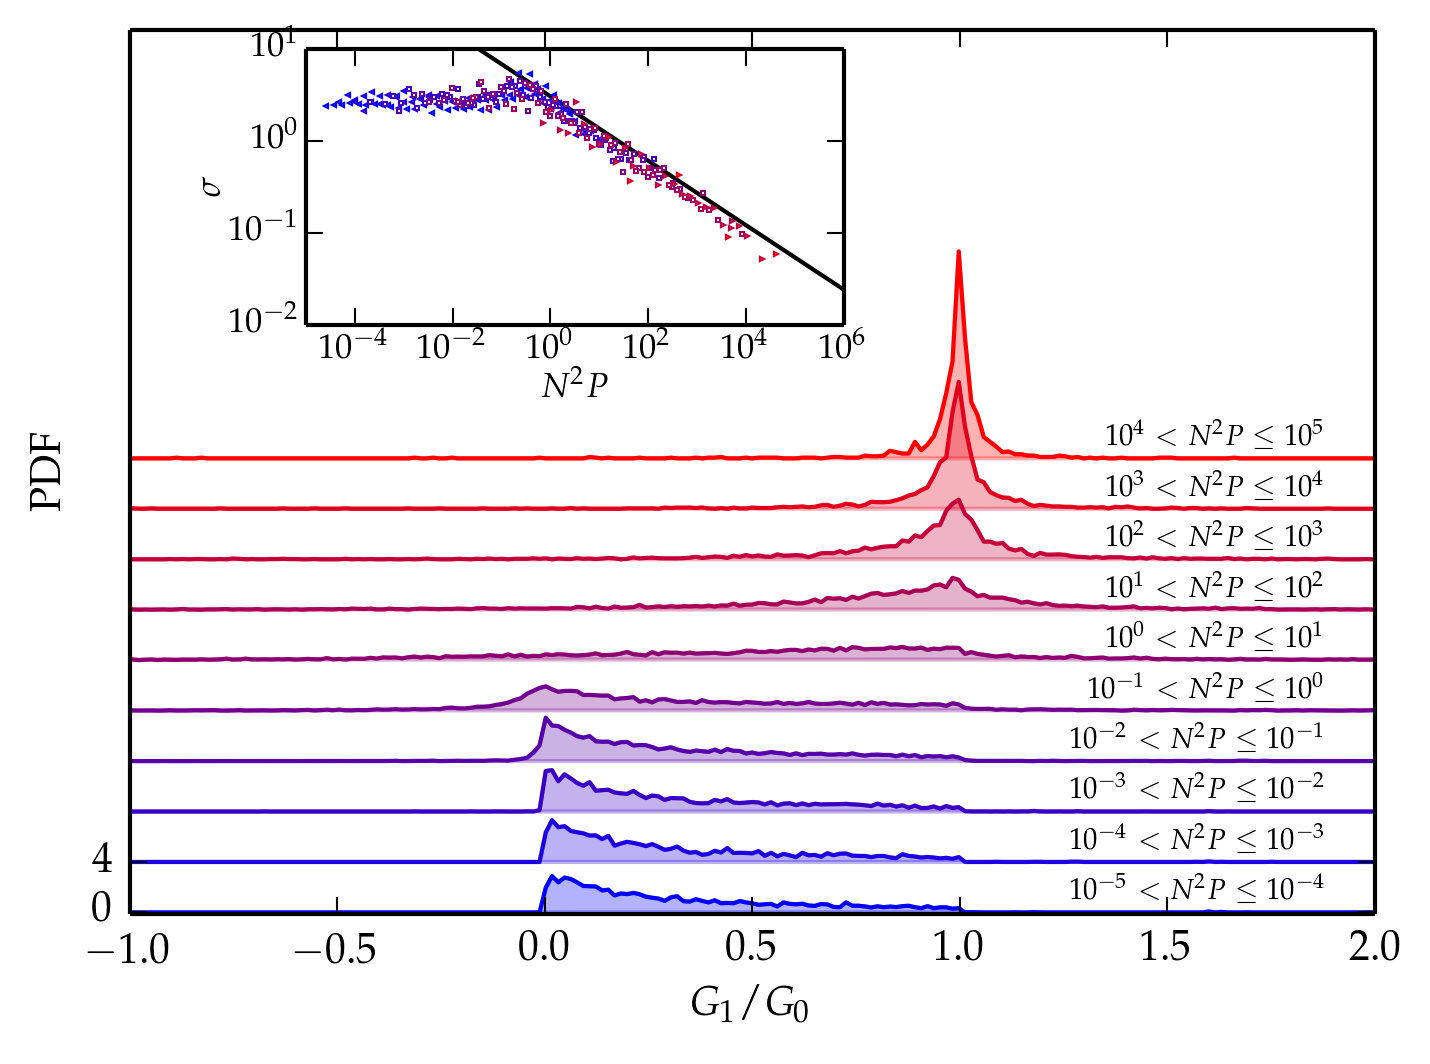

In [33]:
import scipy.stats
dataN = summ["N"]
datalP = around(log10(summ["P"]),2)

binedges = array([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e8])
leftedge = binedges[:-1]
rightedge = binedges[1:]

import collections

figures = {}
bindata = collections.defaultdict(list)

def getbin(N2P):

    for l,r in zip(leftedge, rightedge):
        if l<N2P<=r:
            return l,r
    raise Exception(str(N2P))

for row in summ:
    N = row["N"]
    P = row["P"]    
    
    bindata[getbin(N*N*P)].append( [
        row["c3_plus"] / row["c3_base"],
        row["N+_plus"],
        row["N-_plus"],
        N, P, row["num"]]
    )

bindata = {k:np.array(v) for k,v in bindata.iteritems()}

red = np.array([1,0,0])
blue = np.array([0,0,1])

f=fullfig(hf=1.2)
keys = [x for x in reversed(sorted(bindata.keys()))]
for k in keys:
    v = [x[0] for x in bindata[k]]
    if len(v) < 700:
        continue
    dens, bins = histogram(v, density=True, bins=linspace(-1,2,200))
    print log10(k[0])
    color = blue + (red-blue) * (log10(k[0]) + 5) / (4+5)
    
    shift = 4*log10(k[0]) + 20
    fill( .5 * (bins[1:] + bins[:-1]), dens + shift, color=color, alpha=0.3)
    plot( .5 * (bins[1:] + bins[:-1]), dens + shift, color=color)
    
    text(1.88,shift+1,"$10^{%i}<N^2P\leq10^{%i}$" % (log10(k[0]), log10(k[1])),
         horizontalalignment="right",
         color="k",
         fontsize="x-small")
    
xlabel("$G_1/G_0$")
ylabel(r"$\textrm{PDF}$")
axis(ymin=-0.1, ymax=70)

yticks([0,4])

mkaxes(0.095,.6,0.62,1.13)

stddata = []

for N in unique(dataN):
    for lP in unique(datalP):
        msk = (dataN == N) * (datalP == lP)
        sub = summ[msk]
        
        c3b = sub["c3_base"]
        c3a = sub["c3_plus"]
    
        if len(c3a) < 10:
            continue
    
        sigma = 1    
        bot,med,top = percentile(c3a/c3b, [100*scipy.stats.norm.cdf(-sigma),50,100*scipy.stats.norm.cdf(sigma)])
        
        plot(N*N*10**lP, (top-bot)/med, ms=1, **NPmapper(N,10**lP))
        
        stddata.append([N*N*10**lP, (top-bot)/med])

loglog()

axis(ymax=10,ymin=1e-2,xmin=1e-5,xmax=1e6)
xticks([1e-4,1e-2,1e0,1e2,1e4,1e6], fontsize='small')
gca().set_xticks([], minor=True)
yticks([1e-2,1e-1,1e0,1e1], fontsize='small')
for tick in gca().get_xaxis().get_major_ticks():
    tick.set_pad(2)
xlabel("$N^2P$", fontsize='small', labelpad=.7)

for tick in gca().get_yaxis().get_major_ticks():
    tick.set_pad(1.5)
ylabel(r"$\sigma$", fontsize='small', labelpad=.2)

plt.minorticks_off()
#tick_params(which="y", bottom=False, top=False, left=False, right=False)
    
#xlabel(r"$N^{%i}P$" % 2)
#ylabel(r"$\Delta(G_1/G_0)/<G_1/G_0>$")

x = logspace(-5,7,500)

#plot(x,4*x**-0.5, "k", label="-0.5", zorder=1)
#plot(x,3*x**-0.4, "k", label="-0.5", zorder=1)
plot(x,3.07*x**-0.35, "k", label="-0.5", zorder=1)

savefig('F4-histograms-b.pdf')